# Initialization

In [1]:
import blackhc.notebook
import numpy as np
import itertools
import os
import prettyprinter as pp
import matplotlib.pyplot as plt
import re
import pandas as pd
from collections import Counter

%matplotlib inline
MARKERS = None

Appended /Users/toptotoro_air/Desktop/Georgia-Tech/professor_adibi/with_roy/BatchBALD/src to paths
Switched to directory /Users/toptotoro_air/Desktop/Georgia-Tech/professor_adibi/with_roy/BatchBALD
%load_ext autoreload
%autoreload 2


In [2]:

def calculate_percentage_occurrence(value_list):
    """
    Calculate the percentage occurrence of each value in a list.

    Parameters:
    value_list (list): A list of values.

    Returns:
    dict: A dictionary with the values as keys and their percentage occurrences as values.
    """
    total_count = len(value_list)
    value_counts = Counter(value_list)
    
    percentage_occurrence = {value: (count / total_count) for value, count in value_counts.items()}
    
    return percentage_occurrence

In [3]:
# # Read the content of the .py file
# with open(file_path, 'r') as file:
#     file_content = file.read()

# # Execute the content of the .py file to get the 'store' dictionary
# local_vars = {}
# exec(file_content, {}, local_vars)

# # Extract the 'store' dictionary from the local variables
# store = local_vars['store']

In [4]:
def append_dataframe_label(file_path, acquision_function, seed):
     # Initialize an empty list to store the chosen_targets from each iteration
    all_chosen_targets = []

    value_dictionary = pd.DataFrame(columns=['acquision_function', 'seed', 'iteration_number', 'normal', 'covid', 'train_time', 'batch_time'])
    temp_iter = 0
    
    # Read the content of the .py file
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Execute the content of the .py file to get the 'store' dictionary
    local_vars = {}
    exec(file_content, {}, local_vars)

    # Extract the 'store' dictionary from the local variables
    store = local_vars['store']
    
    # Loop through each iteration and extract the 'chosen_targets'
    for i,iteration in enumerate(store['iterations']):
        #all_chosen_targets.append(iteration['chosen_targets'])
        occurance_dict = calculate_percentage_occurrence(iteration['chosen_targets'])
        # print(occurance_dict)
        # print(acquision_function)
        # print(seed)
        percentage_one = occurance_dict.get(1,0)
        percentage_zero = occurance_dict.get(0,0)
        train_time = iteration['train_model_elapsed_time']
        batch_time = iteration['batch_acquisition_elapsed_time']
        value_dictionary.loc[i,:] = [acquision_function, seed, temp_iter, percentage_zero, percentage_one, train_time, batch_time]
        # value_dictionary = value_dictionary._append({
        #     'acquision_function': acquision_function,
        #     'seed': seed,
        #     'iteration_number': temp_iter,
        #     'class_0%': percentage_zero,
        #     'class_1%': percentage_one,
        #     'train_time': train_time,
        #     'batch_time': batch_time
        # }, ignore_index = True)
        temp_iter += 1
        
    # Convert the list to a numpy array for stacking
    # stacked_chosen_targets = np.array(all_chosen_targets)

    # Print the stacked chosen targets
    return value_dictionary #[percentage_one,percentage_zero,train_time,batch_time]

# print(append_dataframe_label('/Users/toptotoro_air/Desktop/Georgia-Tech/professor_adibi/with_roy/BatchBALD/laaos_results/EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_58.py', 1, 2))

binary_dictionary = pd.DataFrame(columns=['acquision_function', 'seed', 'iteration_number', 'normal', 'covid', 'train_time', 'batch_time'])


directory_path = './laaos_results/EMORY_COVID/binary/'

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a .py file
    if filename.endswith('.py'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        if "_entropy_" in filename:
            pattern = r'_entropy_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            # binary_dictionary.join(append_dataframe_label(file_path = file_path, acquision_function = "_entropy_", seed = number))
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Entropy Sampling", seed = number)], ignore_index = True )
            
        elif "_lc_" in filename:
            pattern = r'_lc_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Least Confidence", seed = number)], ignore_index = True )

        elif "_meanstd_" in filename:
            pattern = r'_meanstd_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Mean STD", seed = number)], ignore_index = True )

        elif "_ms_" in filename:
            pattern = r'_ms_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Margin Sampling", seed = number)], ignore_index = True )

        elif "_multibald_" in filename:
            pattern = r'_multibald_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "BatchBALD", seed = number)], ignore_index = True )

        elif "_random_" in filename:
            pattern = r'_random_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Random", seed = number)], ignore_index = True )

        elif "_vr_" in filename:
            pattern = r'_vr_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            binary_dictionary = pd.concat([binary_dictionary,append_dataframe_label(file_path = file_path, acquision_function = "Var Ratios", seed = number)], ignore_index = True )

        else:
            pass


binary_dictionary
# binary_dictionary[binary_dictionary['seed'] == '58']

,acquision_function,seed,iteration_number,normal,covid,train_time,batch_time
0,Least Confidence,1234,0,0.3,0.7,320.584654,55.225454
1,Least Confidence,1234,1,0.15,0.85,161.500363,54.478514
2,Least Confidence,1234,2,0.5,0.5,399.511524,53.679106
3,Least Confidence,1234,3,0.5,0.5,280.725612,53.035606
4,Least Confidence,1234,4,0.3,0.7,241.983005,53.76092
...,...,...,...,...,...,...,...
882,BatchBALD,1234,5,0.1,0.9,280.459068,70.754159
883,BatchBALD,1234,6,0.4,0.6,479.271458,70.3565
884,BatchBALD,1234,7,0.3,0.7,401.257798,68.857772
885,BatchBALD,1234,8,0.4,0.6,242.03548,68.132423


In [5]:
binary_dictionary.to_csv('binary_dictionary_topto.csv', index=False)

In [6]:
# # Get the current working directory
# current_directory = os.getcwd()

# # Print the current working directory
# print("Current Working Directory:", current_directory)

def append_dataframe_label(file_path, acquision_function, seed):
    # Initialize an empty list to store the chosen_targets from each iteration
    all_chosen_targets = []

    value_dictionary = pd.DataFrame(columns=['acquision_function', 'seed', 'iteration_number', 'normal', 'moderate', 'severe', 'train_time', 'batch_time'])
    temp_iter = 0
    # Read the content of the .py file
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Execute the content of the .py file to get the 'store' dictionary
    local_vars = {}
    exec(file_content, {}, local_vars)
    
    # Extract the 'store' dictionary from the local variables
    store = local_vars['store']
    
    # Loop through each iteration and extract the 'chosen_targets'
    for i,iteration in enumerate(store['iterations']):
        #all_chosen_targets.append(iteration['chosen_targets'])
        occurance_dict = calculate_percentage_occurrence(iteration['chosen_targets'])
        percentage_one = occurance_dict.get(1,0.0)
        percentage_two = occurance_dict.get(2,0.0)
        percentage_zero = occurance_dict.get(0,0.0)
        # pp.pprint(occurance_dict)
        # print(percentage_zero)       
        # print(percentage_one)
        # print(percentage_two)

        train_time = iteration['train_model_elapsed_time']
        batch_time = iteration['batch_acquisition_elapsed_time']
        value_dictionary.loc[i,:] = [acquision_function, seed, temp_iter, percentage_zero, percentage_one, percentage_two, train_time, batch_time]
        temp_iter += 1
        
    # Convert the list to a numpy array for stacking
    # stacked_chosen_targets = np.array(all_chosen_targets)

    # Print the stacked chosen targets
    return value_dictionary #[percentage_one,percentage_zero,train_time,batch_time]

# print(append_dataframe_label('/Users/toptotoro_air/Desktop/Georgia-Tech/professor_adibi/with_roy/BatchBALD/laaos_results/EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_58.py', 1, 2))

multi_dictionary = pd.DataFrame(columns=['acquision_function', 'seed', 'iteration_number', 'normal', 'moderate', 'severe', 'train_time', 'batch_time'])


directory_path = './laaos_results/EMORY_COVID/multi/'

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a .py file
    if filename.endswith('.py'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        if "_entropy_" in filename:
            pattern = r'_entropy_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "Entropy Sampling", seed = number)
            # print(file_path)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            # binary_dictionary.join(append_dataframe_label(file_path = file_path, acquision_function = "_entropy_", seed = number))
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0 )
            
        elif "_lc_" in filename:
            pattern = r'_lc_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "Least Confidence", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary, a], axis = 0 )

        elif "_meanstd_" in filename:
            pattern = r'_meanstd_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "Mean STD", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0 )

        elif "_ms_" in filename:
            pattern = r'_ms_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "Margin Sampling", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0 )

        elif "_multibald_" in filename:
            pattern = r'_multibald_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "BatchBALD", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0 )

        elif "_random_" in filename:
            pattern = r'_random_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a = append_dataframe_label(file_path = file_path, acquision_function = "Random", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0)

        elif "_vr_" in filename:
            pattern = r'_vr_(\d+)\.py'
            match = re.search(pattern, filename)
            number = match.group(1)
            a =append_dataframe_label(file_path = file_path, acquision_function = "Var Ratios", seed = number)
            # print(a)
            # print("hellop")
            # print(multi_dictionary)
            multi_dictionary = pd.concat([multi_dictionary,a], axis = 0 )

        else:
            pass


multi_dictionary
# binary_dictionary[binary_dictionary['seed'] == '58']

,acquision_function,seed,iteration_number,normal,moderate,severe,train_time,batch_time
0,Random,9031,0,0.0,0.5,0.5,202.088755,0.000556
1,Random,9031,1,0.0,0.25,0.75,162.327867,0.000565
2,Random,9031,2,0.1,0.45,0.45,162.669118,0.000563
3,Random,9031,3,0.05,0.45,0.5,242.49003,0.000556
4,Random,9031,4,0.0,0.35,0.65,243.388152,0.000548
...,...,...,...,...,...,...,...,...
15,Entropy Sampling,9031,15,0.25,0.35,0.4,241.210239,44.133919
16,Entropy Sampling,9031,16,0.35,0.35,0.3,200.819059,43.409668
17,Entropy Sampling,9031,17,0.05,0.4,0.55,318.469532,42.811698
18,Entropy Sampling,9031,18,0.2,0.6,0.2,553.686896,42.113841


In [7]:
multi_dictionary.to_csv('multi_dictionary_topto.csv', index=False)

In [8]:
df_multi = multi_dictionary.copy(deep=True)
df_multi.groupby('acquision_function')[["normal", "moderate", "severe"]].agg(['mean', 'std', 'median'])

normal                   moderate                   \
                        mean       std median      mean       std median   
acquision_function                                                         
BatchBALD           0.304074  0.175777    0.3  0.407407  0.137069    0.4   
Entropy Sampling    0.225701  0.161561    0.2  0.442991  0.110626   0.45   
Least Confidence    0.218182  0.155385    0.2  0.466234  0.128323  0.475   
Margin Sampling     0.183178  0.100926    0.2  0.457477  0.122821   0.45   
Mean STD            0.294811  0.205395   0.25  0.416038  0.143186    0.4   
Random              0.132593  0.075636   0.15  0.372963  0.105583    0.4   
Var Ratios            0.2192  0.150909    0.2    0.4688  0.133148   0.45   

                      severe                   
                        mean       std median  
acquision_function                             
BatchBALD           0.288519  0.167615   0.25  
Entropy Sampling    0.331308  0.165051    0.3  
Least Confidence    0.315584  0.155878    0.3  
Margin Sampling     0.359346  0.119379   0.35  
Mean STD            0.289151  0.180872   0.25  
Random              0.494444  0.103784    0.5  
Var Ratios             0.312  0.151658    0.3

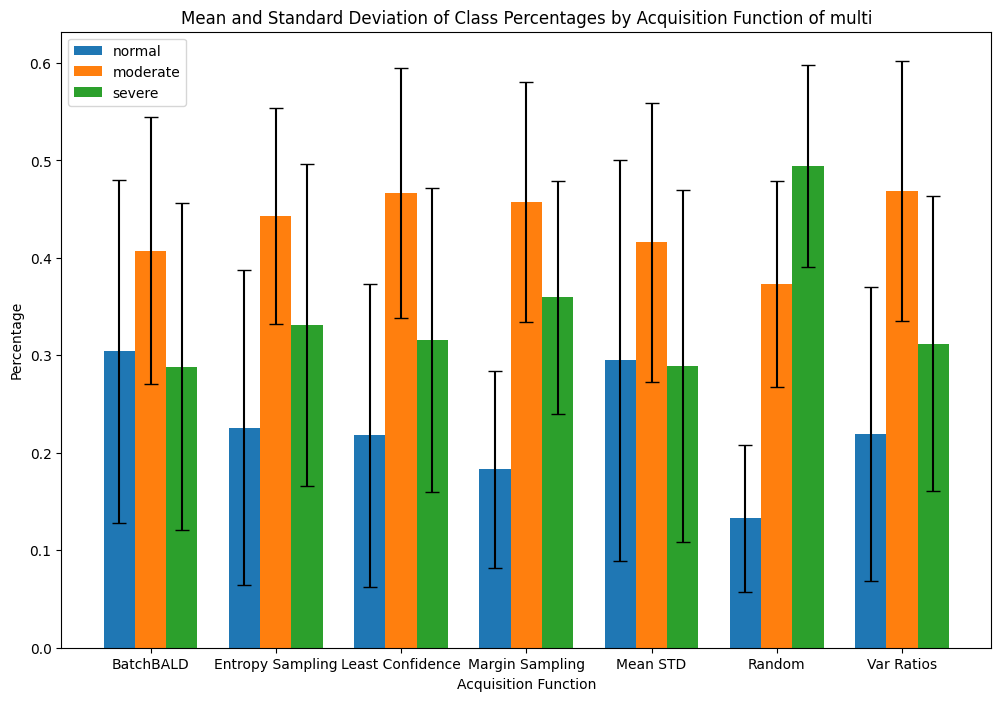

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Group by acquisition function and calculate mean and standard deviation of class percentages
grouped_df = df_multi.groupby('acquision_function').agg({'normal': ['mean', 'std'], 'moderate': ['mean', 'std'], 'severe': ['mean', 'std']})

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns]

# Plotting the bar chart with error bars
plt.figure(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.25
index = np.arange(len(grouped_df))

# Bar plot for class_0%
plt.bar(index, grouped_df['normal_mean'], yerr=grouped_df['normal_std'], capsize=5, label='normal', width=bar_width, align='center')

# Bar plot for class_1%
plt.bar(index + bar_width, grouped_df['moderate_mean'], yerr=grouped_df['moderate_std'], capsize=5, label='moderate', width=bar_width, align='center')

# Bar plot for class_2%
plt.bar(index + 2 * bar_width, grouped_df['severe_mean'], yerr=grouped_df['severe_std'], capsize=5, label='severe', width=bar_width, align='center')

# Set x-ticks and labels
plt.xlabel('Acquisition Function')
plt.ylabel('Percentage')
plt.title('Mean and Standard Deviation of Class Percentages by Acquisition Function of multi')
plt.xticks(index + bar_width, grouped_df.index)
plt.legend()
plt.show()

In [10]:
df_multi_iter = multi_dictionary.copy(deep=True)
df_multi_iter = df_multi_iter.groupby(['acquision_function', 'iteration_number'])[["normal", "moderate", "severe"]].agg(
    [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
)
# Rename the columns
df_multi_iter.columns = df_multi_iter.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')
df_multi_iter

normal_25% quartile normal_median  \
acquision_function iteration_number                                      
BatchBALD          0                              0.2000          0.25   
                   1                              0.2625           0.3   
                   2                              0.3125         0.375   
                   3                              0.2125           0.3   
                   4                              0.3125          0.35   
...                                                  ...           ...   
Var Ratios         29                             0.1500          0.15   
                   30                             0.2500          0.25   
                   31                             0.0000           0.0   
                   32                             0.0500          0.05   
                   33                             0.1000           0.1   

                                     normal_75% quartile  \
acquision_function iteration_number                        
BatchBALD          0                              0.3375   
                   1                              0.3375   
                   2                              0.4375   
                   3                              0.3875   
                   4                              0.3875   
...                                                  ...   
Var Ratios         29                             0.1500   
                   30                             0.2500   
                   31                             0.0000   
                   32                             0.0500   
                   33                             0.1000   

                                     moderate_25% quartile moderate_median  \
acquision_function iteration_number                                          
BatchBALD          0                                0.2375            0.35   
                   1                                0.3250           0.425   
                   2                                0.3500           0.375   
                   3                                0.2750            0.35   
                   4                                0.2625            0.35   
...                                                    ...             ...   
Var Ratios         29                               0.4000             0.4   
                   30                               0.4500            0.45   
                   31                               0.3000             0.3   
                   32                               0.7000             0.7   
                   33                               0.6000             0.6   

                                     moderate_75% quartile  \
acquision_function iteration_number                          
BatchBALD          0                                0.3500   
                   1                                0.4875   
                   2                                0.4000   
                   3                                0.3500   
                   4                                0.4375   
...                                                    ...   
Var Ratios         29                               0.4000   
                   30                               0.4500   
                   31                               0.3000   
                   32                               0.7000   
                   33                               0.6000   

                                     severe_25% quartile severe_median  \
acquision_function iteration_number                                      
BatchBALD          0                              0.3125         0.375   
                   1                              0.2625         0.325   
                   2                              0.2000         0.225   
                   3                              0.2750         0.425   
                   4       

<Figure size 1200x800 with 0 Axes>

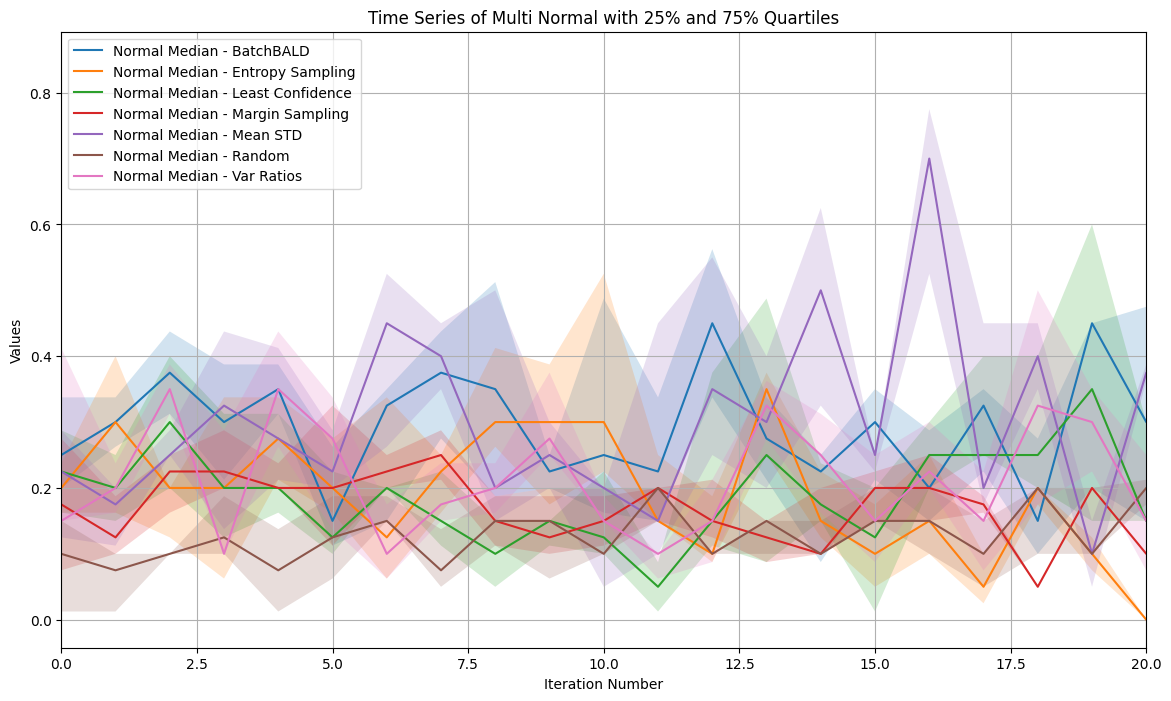

In [11]:
df_multi_iter = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'normal': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'moderate': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'severe': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_multi_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['normal_median'], label=f'Normal Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['normal_25% quartile'], data['normal_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Multi Normal with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

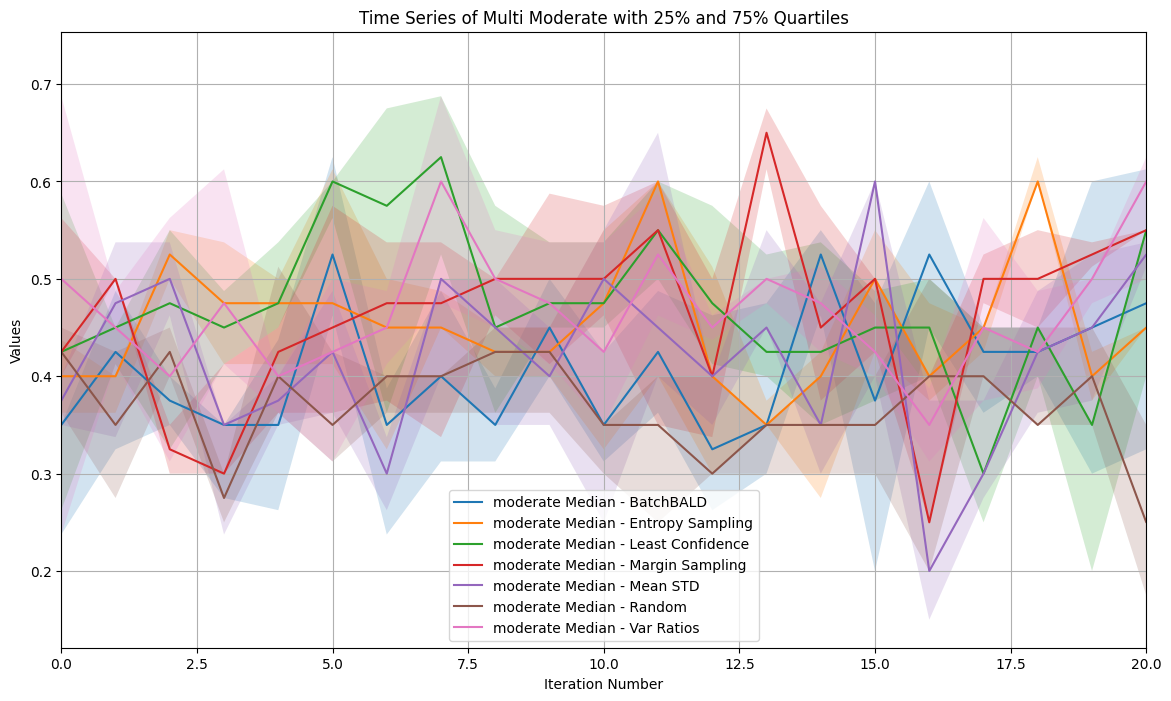

In [12]:
df_multi_iter = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'normal': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'moderate': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'severe': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_multi_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['moderate_median'], label=f'moderate Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['moderate_25% quartile'], data['moderate_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Multi Moderate with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

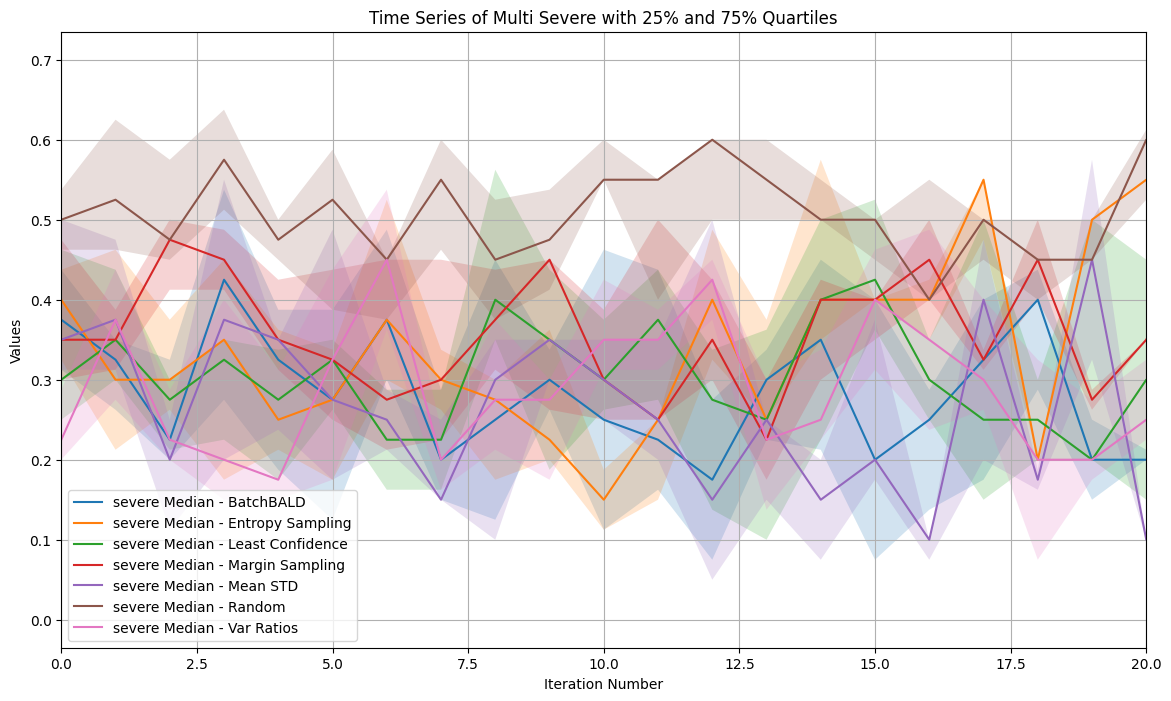

In [13]:
df_multi_iter = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'normal': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'moderate': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'severe': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_multi_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['severe_median'], label=f'severe Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['severe_25% quartile'], data['severe_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Multi Severe with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

In [14]:
df_multi_time = multi_dictionary.copy(deep = True)

# Group by acquisition function and calculate mean and standard deviation of class percentages
df_multi_time.groupby('acquision_function').agg({'train_time': ['mean', 'std'], 'batch_time': ['mean', 'std']})

train_time             batch_time          
                          mean         std       mean       std
acquision_function                                             
BatchBALD           302.924659   97.202863  75.752972  7.255927
Entropy Sampling    362.779576  129.398631  47.589882  5.042143
Least Confidence     354.65124  117.985012  45.284204  5.612286
Margin Sampling     345.078085  112.423595  47.091849  5.490821
Mean STD             340.57348  129.270636  47.517529  5.178404
Random               347.09787  121.653366   0.000565  0.000038
Var Ratios          338.737564  126.751676  46.338795  5.813129

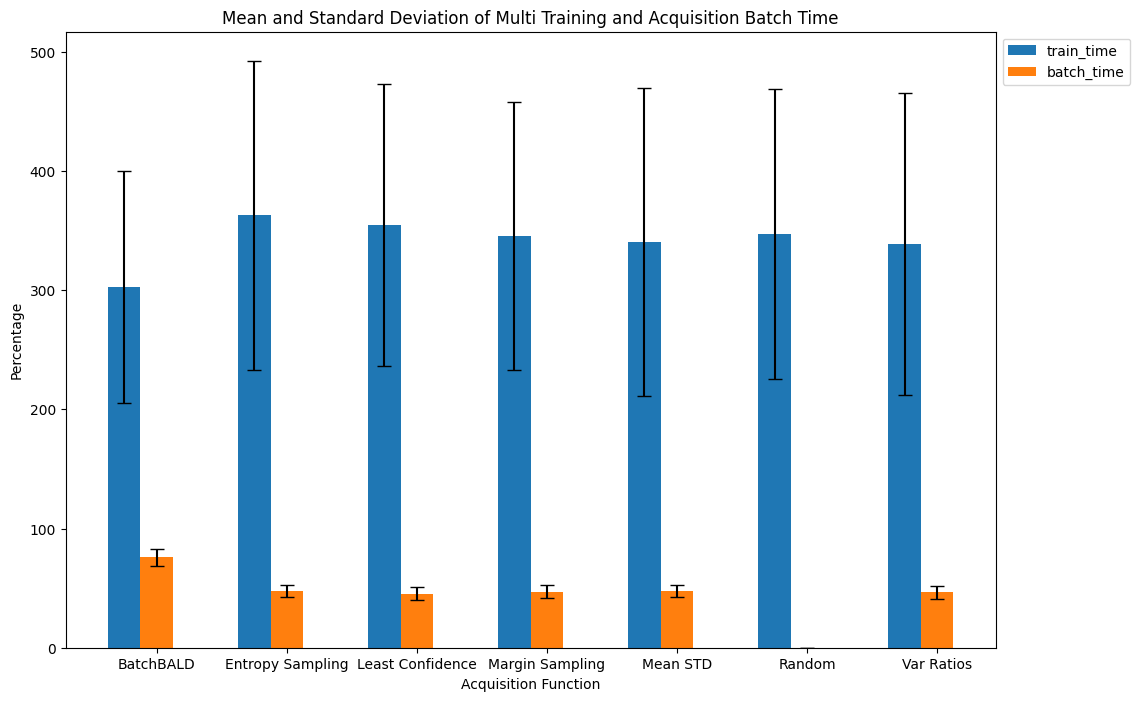

In [15]:
df_multi_time = multi_dictionary.copy(deep = True)

# Group by acquisition function and calculate mean and standard deviation of class percentages
grouped_df = df_multi_time.groupby('acquision_function').agg({'train_time': ['mean', 'std'], 'batch_time': ['mean', 'std']})

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns]

# Plotting the bar chart with error bars
plt.figure(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.25
index = np.arange(len(grouped_df))

# Bar plot for train_time
plt.bar(index, grouped_df['train_time_mean'], yerr=grouped_df['train_time_std'], capsize=5, label='train_time', width=bar_width, align='center')

# Bar plot for batch_time
plt.bar(index + bar_width, grouped_df['batch_time_mean'], yerr=grouped_df['batch_time_std'], capsize=5, label='batch_time', width=bar_width, align='center')

# Set x-ticks and labels
plt.xlabel('Acquisition Function')
plt.ylabel('Percentage')
plt.title('Mean and Standard Deviation of Multi Training and Acquisition Batch Time')
plt.xticks(index + bar_width, grouped_df.index)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Move the legend to the left
plt.show()

<Figure size 1200x800 with 0 Axes>

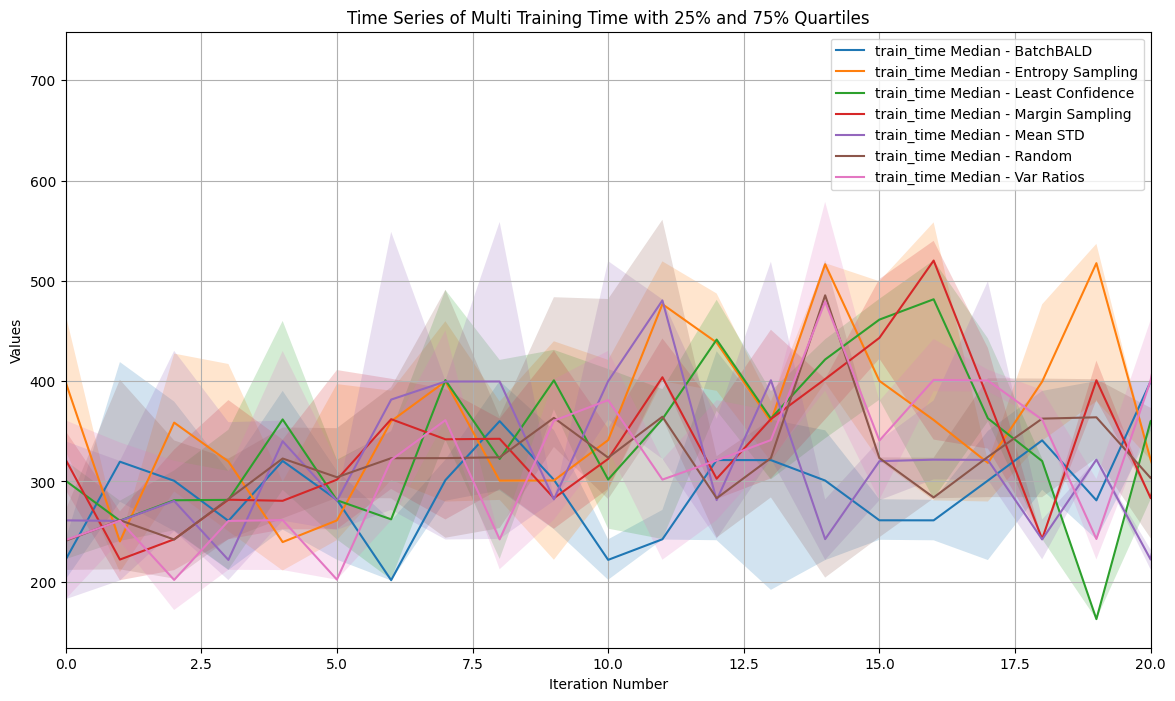

In [34]:
df_multi_time = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_time_df = df_multi_time.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_time_df.columns = grouped_time_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_time_df = grouped_time_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_time_df['acquision_function'].unique():
    data = grouped_time_df[grouped_time_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['train_time_median'], label=f'train_time Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['train_time_25% quartile'], data['train_time_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Multi Training Time with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

In [38]:
df_multi_time = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_time_df = df_multi_time.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_time_df.columns = grouped_time_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

grouped_time_df

train_time_25% quartile  \
acquision_function iteration_number                            
BatchBALD          0                              202.240982   
                   1                              279.829404   
                   2                              250.591611   
                   3                              211.606118   
                   4                              251.961524   
...                                                      ...   
Var Ratios         29                             162.455532   
                   30                             479.883834   
                   31                             481.055494   
                   32                             401.167467   
                   33                             440.945520   

                                    train_time_median  \
acquision_function iteration_number                     
BatchBALD          0                       222.021661   
                   1                       319.660522   
                   2                       300.614934   
                   3                       260.636605   
                   4                       320.424123   
...                                               ...   
Var Ratios         29                      162.455532   
                   30                      479.883834   
                   31                      481.055494   
                   32                      401.167467   
                   33                       440.94552   

                                     train_time_75% quartile  \
acquision_function iteration_number                            
BatchBALD          0                              242.147167   
                   1                              419.024945   
                   2                              379.636118   
                   3                              310.248343   
                   4                              390.302033   
...                                                      ...   
Var Ratios         29                             162.455532   
                   30                             479.883834   
                   31                             481.055494   
                   32                             401.167467   
                   33                             440.945520   

                                     batch_time_25% quartile  \
acquision_function iteration_number                            
BatchBALD          0                               87.441427   
                   1                               86.289440   
                   2                               85.088273   
                   3                               83.964288   
                   4                               82.704830   
...                                                      ...   
Var Ratios         29                              33.728144   
                   30                              33.102103   
                   31                              32.490811   
                   32                              31.950430   
                   33                              31.024058   

                                    batch_time_median  batch_time_75% quartile  
acquision_function iteration_number                                             
BatchBALD          0                        87.635488                87.928702  
                   1                        86.399897                86.526437  
                   2                        85.199126                85.292676  
                   3                        84.093263                84.342988  
                   4                        82.919346                83.096860  
...                                               ...                      ...  
Var Ratios         29                       33.728144                33.728144  
                   30                       33.102103              

<Figure size 1200x800 with 0 Axes>

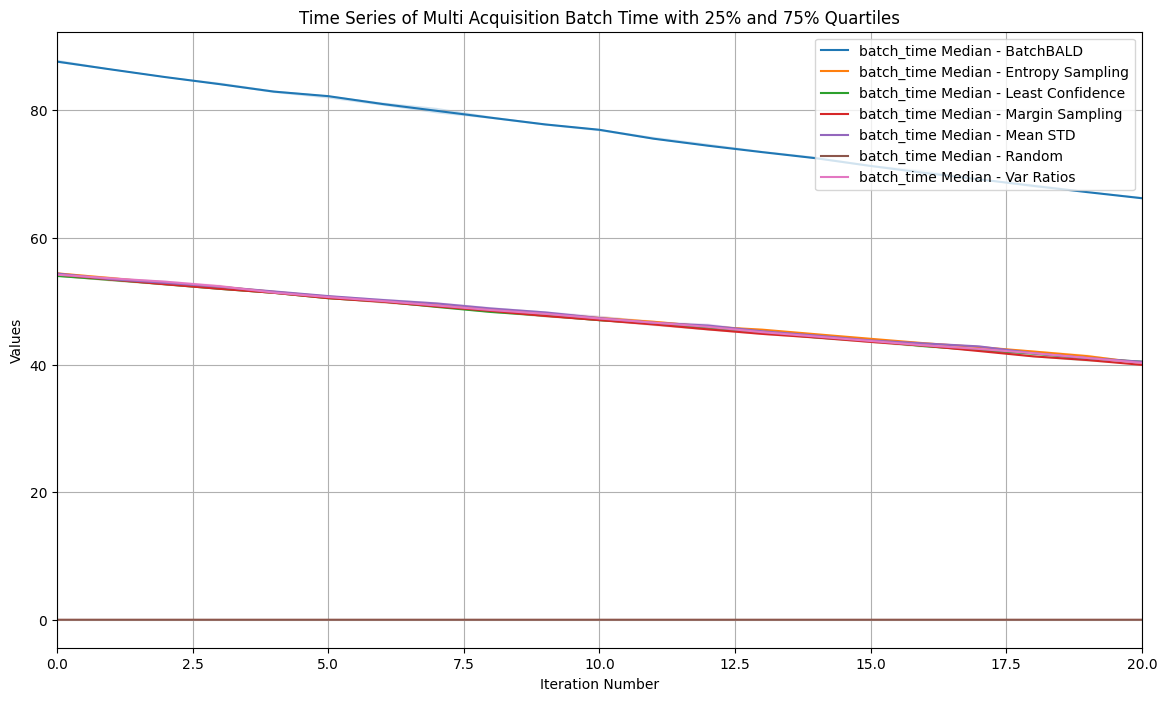

In [37]:
df_multi_time = multi_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_time_df = df_multi_time.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_time_df.columns = grouped_time_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_time_df = grouped_time_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_time_df['acquision_function'].unique():
    data = grouped_time_df[grouped_time_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['batch_time_median'], label=f'batch_time Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['batch_time_25% quartile'], data['batch_time_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Multi Acquisition Batch Time with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

In [16]:
df_binary = binary_dictionary.copy(deep=True)
df_binary.groupby('acquision_function')[["normal", "covid"]].agg(['mean', 'std', 'median'])

normal                      covid                 
                        mean       std median      mean       std median
acquision_function                                                      
BatchBALD           0.297009  0.210632   0.25  0.702991  0.210632   0.75
Entropy Sampling    0.351685  0.196482    0.3  0.648315  0.196482    0.7
Least Confidence    0.355752  0.226360    0.3  0.644248  0.226360    0.7
Margin Sampling      0.35625  0.212887   0.35   0.64375  0.212887   0.65
Mean STD               0.353  0.225050   0.35     0.647  0.225050   0.65
Random              0.131197  0.070931  0.125  0.868803  0.070931  0.875
Var Ratios          0.339344  0.200230  0.325  0.660656  0.200230  0.675

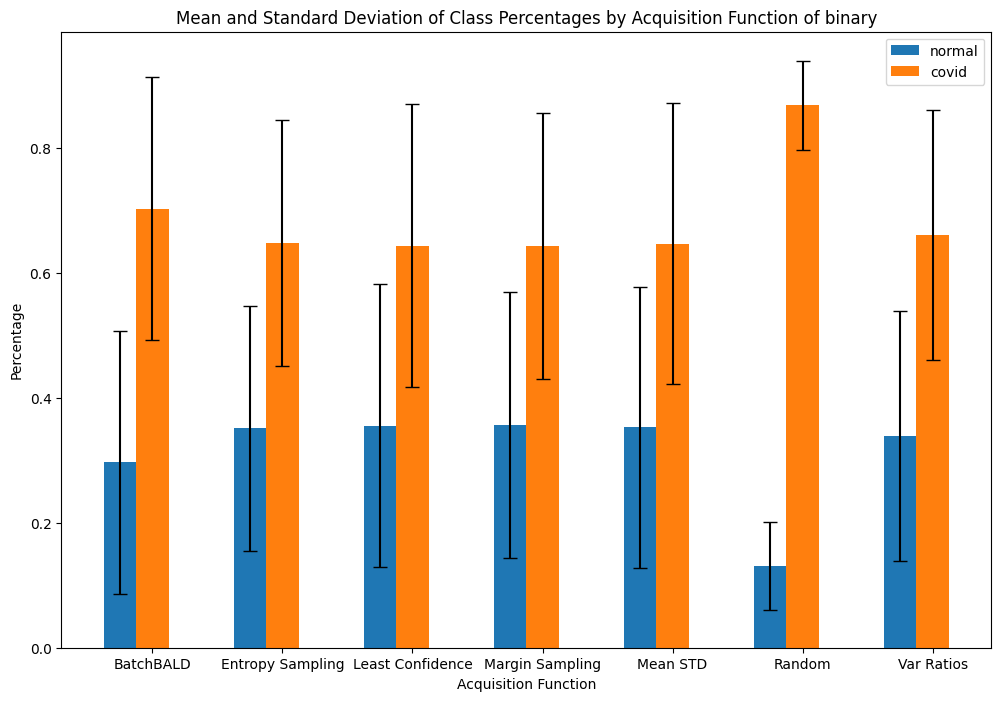

In [17]:
# Group by acquisition function and calculate mean and standard deviation of class percentages
grouped_df = df_binary.groupby('acquision_function').agg({'normal': ['mean', 'std'], 'covid': ['mean', 'std']})

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns]

# Plotting the bar chart with error bars
plt.figure(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.25
index = np.arange(len(grouped_df))

# Bar plot for class_0%
plt.bar(index, grouped_df['normal_mean'], yerr=grouped_df['normal_std'], capsize=5, label='normal', width=bar_width, align='center')

# Bar plot for class_1%
plt.bar(index + bar_width, grouped_df['covid_mean'], yerr=grouped_df['covid_std'], capsize=5, label='covid', width=bar_width, align='center')

# Set x-ticks and labels
plt.xlabel('Acquisition Function')
plt.ylabel('Percentage')
plt.title('Mean and Standard Deviation of Class Percentages by Acquisition Function of binary')
plt.xticks(index + bar_width, grouped_df.index)
plt.legend()
plt.show()

In [18]:
binary_dictionary
# train time and batch time call it: training and acquisition batch time mean and SD

,acquision_function,seed,iteration_number,normal,covid,train_time,batch_time
0,Least Confidence,1234,0,0.3,0.7,320.584654,55.225454
1,Least Confidence,1234,1,0.15,0.85,161.500363,54.478514
2,Least Confidence,1234,2,0.5,0.5,399.511524,53.679106
3,Least Confidence,1234,3,0.5,0.5,280.725612,53.035606
4,Least Confidence,1234,4,0.3,0.7,241.983005,53.76092
...,...,...,...,...,...,...,...
882,BatchBALD,1234,5,0.1,0.9,280.459068,70.754159
883,BatchBALD,1234,6,0.4,0.6,479.271458,70.3565
884,BatchBALD,1234,7,0.3,0.7,401.257798,68.857772
885,BatchBALD,1234,8,0.4,0.6,242.03548,68.132423


In [19]:
df_binary_iter = binary_dictionary.copy(deep=True)
df_binary_iter = df_binary_iter.groupby(['acquision_function', 'iteration_number'])[["normal", "covid"]].agg(
    [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
)
# Rename the columns
df_binary_iter.columns = df_binary_iter.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')
df_binary_iter

normal_25% quartile normal_median  \
acquision_function iteration_number                                      
BatchBALD          0                              0.1500          0.15   
                   1                              0.2625           0.3   
                   2                              0.2750          0.35   
                   3                              0.4125         0.475   
                   4                              0.3125         0.375   
...                                                  ...           ...   
Var Ratios         28                             0.7000           0.7   
                   29                             0.5000           0.5   
                   30                             0.0500          0.05   
                   31                             0.1000           0.1   
                   32                             0.1000           0.1   

                                     normal_75% quartile  covid_25% quartile  \
acquision_function iteration_number                                            
BatchBALD          0                              0.2625              0.7375   
                   1                              0.4125              0.5875   
                   2                              0.3500              0.6500   
                   3                              0.5000              0.5000   
                   4                              0.4375              0.5625   
...                                                  ...                 ...   
Var Ratios         28                             0.7000              0.3000   
                   29                             0.5000              0.5000   
                   30                             0.0500              0.9500   
                   31                             0.1000              0.9000   
                   32                             0.1000              0.9000   

                                    covid_median  covid_75% quartile  
acquision_function iteration_number                                   
BatchBALD          0                        0.85              0.8500  
                   1                         0.7              0.7375  
                   2                        0.65              0.7250  
                   3                       0.525              0.5875  
                   4                       0.625              0.6875  
...                                          ...                 ...  
Var Ratios         28                        0.3              0.3000  
                   29                        0.5              0.5000  
                   30                       0.95              0.9500  
                   31                        0.9              0.9000  
                   32                        0.9              0.9000  

[223 rows x 6 columns]

<Figure size 1200x800 with 0 Axes>

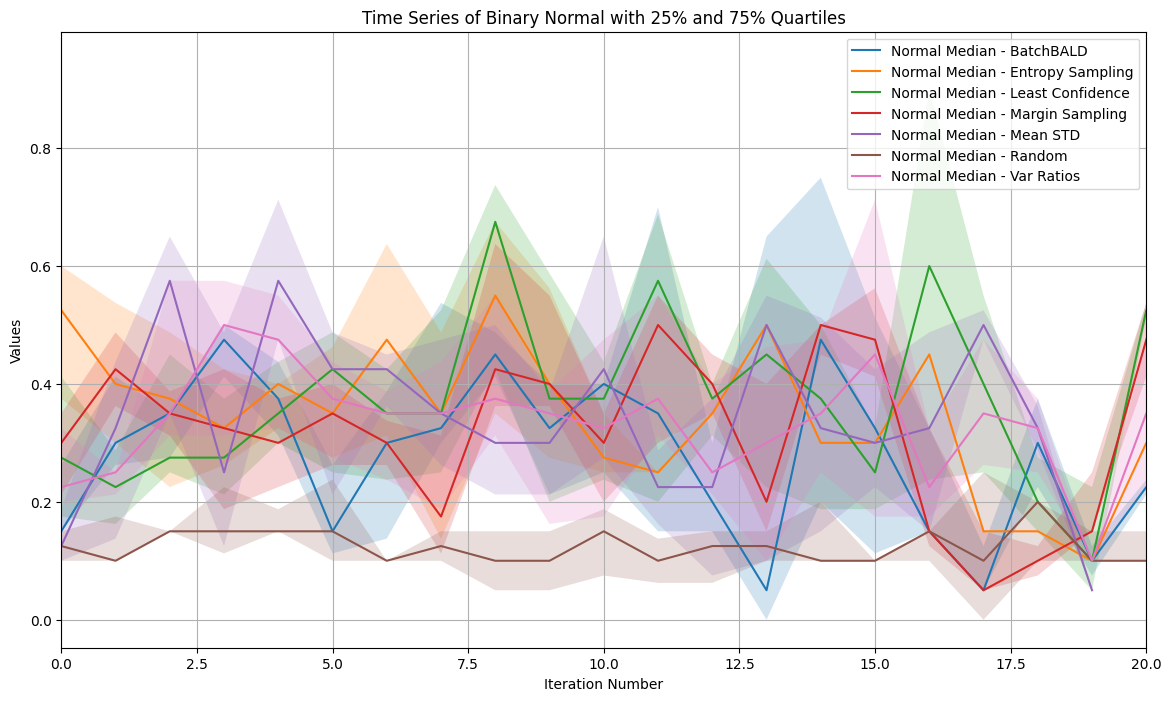

In [20]:
df_binary_iter = binary_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'normal': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'covid': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_binary_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['normal_median'], label=f'Normal Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['normal_25% quartile'], data['normal_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Binary Normal with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

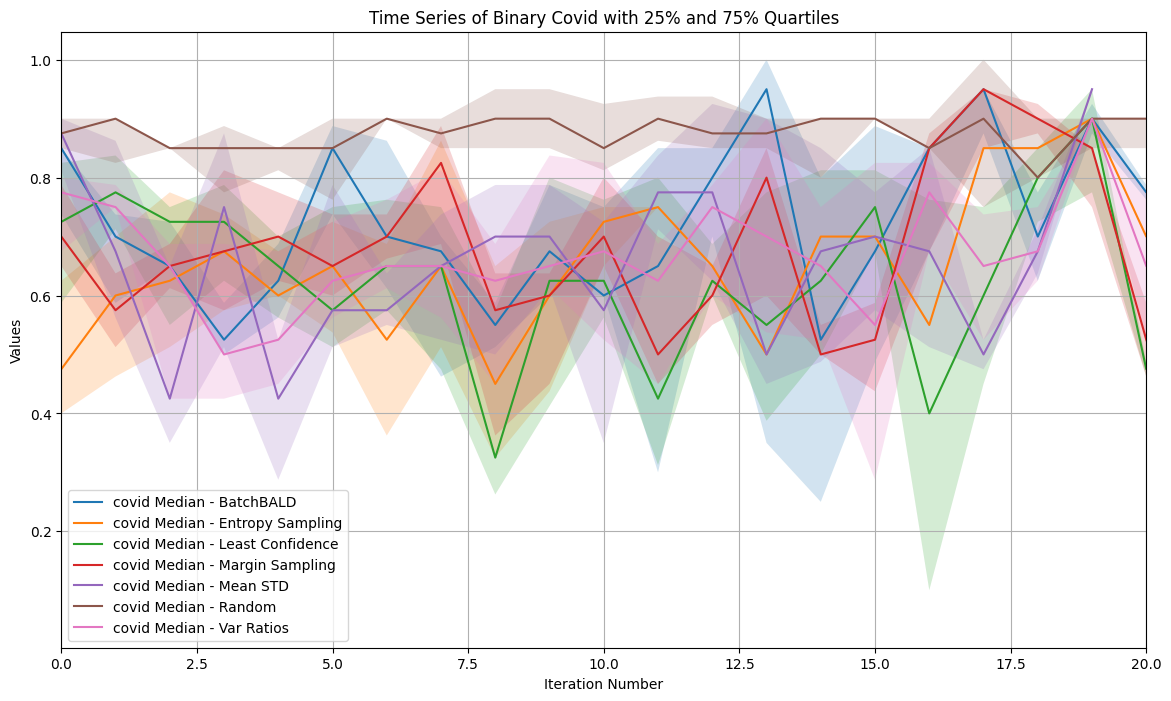

In [21]:
df_binary_iter = binary_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'normal': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'covid': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_binary_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['covid_median'], label=f'covid Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['covid_25% quartile'], data['covid_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Binary Covid with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

In [22]:
df_binary_time = binary_dictionary.copy(deep = True)

# Group by acquisition function and calculate mean and standard deviation of class percentages
df_binary_time.groupby('acquision_function').agg({'train_time': ['mean', 'std'], 'batch_time': ['mean', 'std']})

train_time             batch_time          
                          mean         std       mean       std
acquision_function                                             
BatchBALD           317.886065  115.202300  65.725698  7.179599
Entropy Sampling    329.580845   92.856154  48.587797  6.173414
Least Confidence    307.469483  109.936020  49.441722  6.459916
Margin Sampling      326.62268  122.644399  48.996957  5.017803
Mean STD            287.210107   97.789507   49.78784  3.621549
Random              302.904547  103.037868   0.000564  0.000040
Var Ratios          335.745085  111.222832  48.087989  5.493773

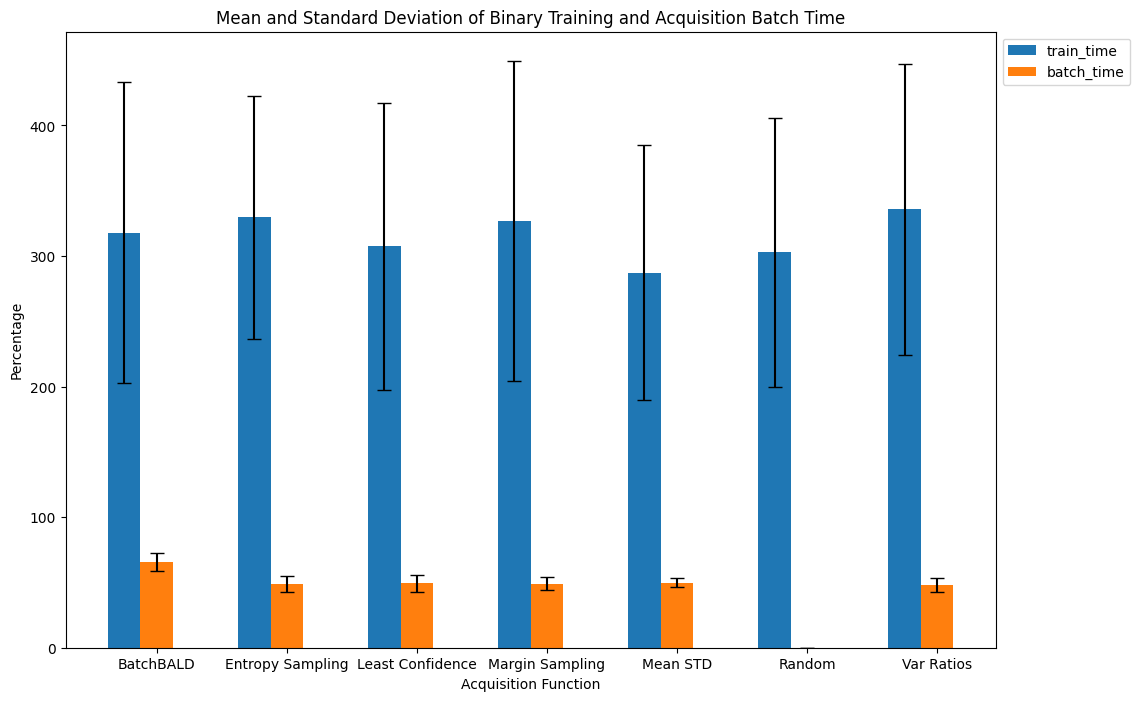

In [23]:
df_binary_time = binary_dictionary.copy(deep = True)

# Group by acquisition function and calculate mean and standard deviation of class percentages
grouped_df = df_binary_time.groupby('acquision_function').agg({'train_time': ['mean', 'std'], 'batch_time': ['mean', 'std']})

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns]

# Plotting the bar chart with error bars
plt.figure(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.25
index = np.arange(len(grouped_df))

# Bar plot for train_time
plt.bar(index, grouped_df['train_time_mean'], yerr=grouped_df['train_time_std'], capsize=5, label='train_time', width=bar_width, align='center')

# Bar plot for batch_time
plt.bar(index + bar_width, grouped_df['batch_time_mean'], yerr=grouped_df['batch_time_std'], capsize=5, label='batch_time', width=bar_width, align='center')

# Set x-ticks and labels
plt.xlabel('Acquisition Function')
plt.ylabel('Percentage')
plt.title('Mean and Standard Deviation of Binary Training and Acquisition Batch Time')
plt.xticks(index + bar_width, grouped_df.index)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Move the legend to the left
plt.show()

In [39]:
df_binary_iter = binary_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_binary_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

grouped_iter_df

train_time_25% quartile  \
acquision_function iteration_number                            
BatchBALD          0                              213.643386   
                   1                              200.628441   
                   2                              210.693092   
                   3                              240.774635   
                   4                              250.328112   
...                                                      ...   
Var Ratios         28                             201.544062   
                   29                             241.221361   
                   30                             162.124973   
                   31                             281.200758   
                   32                             359.826366   

                                    train_time_median  \
acquision_function iteration_number                     
BatchBALD          0                       280.195922   
                   1                       240.384447   
                   2                       379.197251   
                   3                       260.715303   
                   4                       300.001272   
...                                               ...   
Var Ratios         28                      201.544062   
                   29                      241.221361   
                   30                      162.124973   
                   31                      281.200758   
                   32                      359.826366   

                                     train_time_75% quartile  \
acquision_function iteration_number                            
BatchBALD          0                              320.522069   
                   1                              309.621627   
                   2                              516.551146   
                   3                              338.944151   
                   4                              350.720723   
...                                                      ...   
Var Ratios         28                             201.544062   
                   29                             241.221361   
                   30                             162.124973   
                   31                             281.200758   
                   32                             359.826366   

                                     batch_time_25% quartile  \
acquision_function iteration_number                            
BatchBALD          0                               75.442688   
                   1                               74.814627   
                   2                               73.493358   
                   3                               72.579978   
                   4                               71.401161   
...                                                      ...   
Var Ratios         28                              35.706240   
                   29                              35.111862   
                   30                              34.539863   
                   31                              33.998611   
                   32                              33.205755   

                                    batch_time_median  batch_time_75% quartile  
acquision_function iteration_number                                             
BatchBALD          0                        75.661215                76.198184  
                   1                        74.925592                75.093000  
                   2                        73.560095                74.077766  
                   3                        72.807011                72.854837  
                   4                         71.57359                72.022815  
...                                               ...                      ...  
Var Ratios         28                        35.70624                35.706240  
                   29                       35.111862              

<Figure size 1200x800 with 0 Axes>

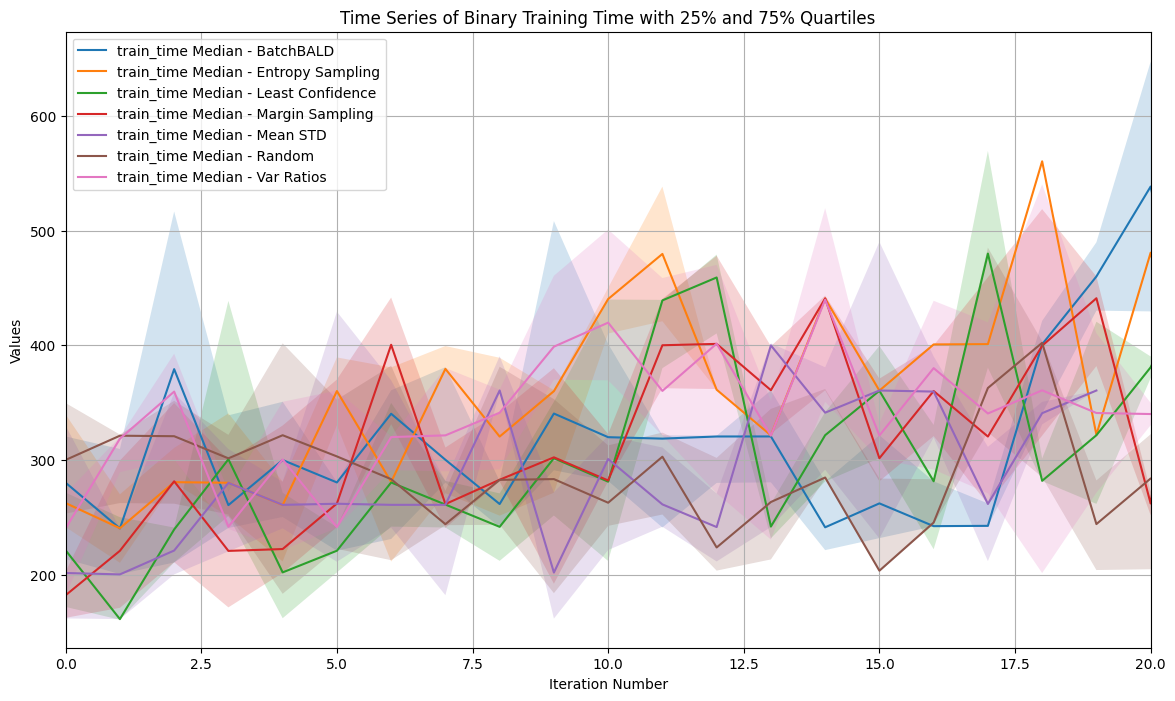

In [29]:
df_binary_iter = binary_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_binary_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['train_time_median'], label=f'train_time Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['train_time_25% quartile'], data['train_time_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Binary Training Time with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

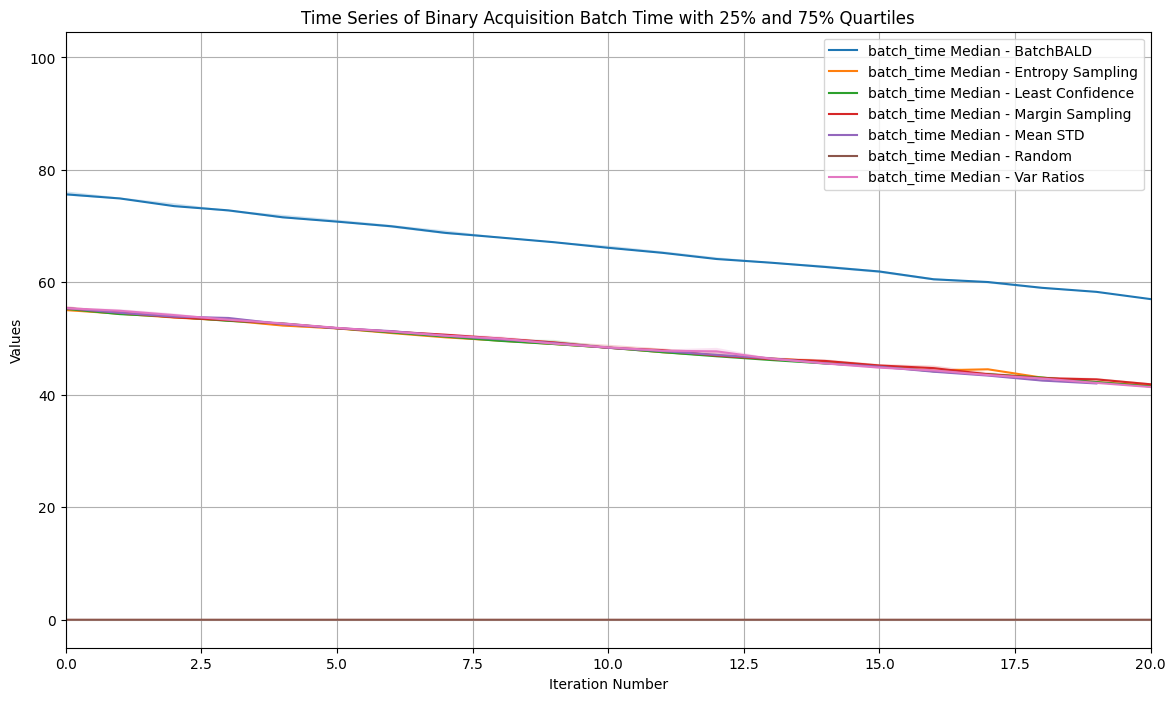

In [32]:
df_binary_iter = binary_dictionary.copy(deep=True)

# Define the aggregation functions
agg_funcs = {
    'train_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)],
    'batch_time': [lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]
}

# Perform the groupby and aggregation
grouped_iter_df = df_binary_iter.groupby(['acquision_function', 'iteration_number']).agg(agg_funcs)

# Rename the columns
grouped_iter_df.columns = grouped_iter_df.columns.map(lambda x: f'{x[0]}_{"25% quartile" if x[1] == "<lambda_0>" else "median" if x[1] == "median" else "75% quartile"}')

# grouped_iter_df

# Helper function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# Plotting the time plot with IQR
plt.figure(figsize=(12, 8))

# Reset index for easier plotting
grouped_iter_df = grouped_iter_df.reset_index()

# Plotting
plt.figure(figsize=(14, 8))

for func in grouped_iter_df['acquision_function'].unique():
    data = grouped_iter_df[grouped_iter_df['acquision_function'] == func]
    
    # Plot median line
    plt.plot(data['iteration_number'], data['batch_time_median'], label=f'batch_time Median - {func}')
    
    # Fill area between 25% and 75% quantiles
    plt.fill_between(data['iteration_number'], data['batch_time_25% quartile'], data['batch_time_75% quartile'], alpha=0.2)

plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Time Series of Binary Acquisition Batch Time with 25% and 75% Quartiles')
plt.legend()
plt.xlim(0, 20)  # Set x-axis limit
plt.grid(True)
plt.show()

In [24]:
# # Group by acquisition function and iteration number, then calculate the median and IQR for class percentages
# grouped_iter_df = df.groupby(['acquision_function', 'iteration_number']).agg({
#     'class_0%': ['median', 'quantile'],
#     'class_1%': ['median', 'quantile']
# }).reset_index()

# # Helper function to calculate IQR
# def iqr(x):
#     return x.quantile(0.75) - x.quantile(0.25)

# # Calculate IQR
# grouped_iter_df['class_0%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_0%'].apply(iqr)
# grouped_iter_df['class_1%_iqr'] = df.groupby(['acquision_function', 'iteration_number'])['class_1%'].apply(iqr)

# # Plotting the time plot with IQR
# plt.figure(figsize=(12, 8))

# # Time plot for class_0%
# for function in grouped_iter_df['acquision_function'].unique():
#     subset = grouped_iter_df[grouped_iter_df['acquision_function'] == function]
#     plt.plot(subset['iteration_number'], subset[('class_0%', 'median')], label=f'{function} class_0%')
#     plt.fill_between(subset['iteration_number'], subset[('class_0%', 'median')] - subset['class_0%_iqr'] / 2,
#                      subset[('class_0%', 'median')] + subset['class_0%_iqr'] / 2, alpha=0.2)

# # Time plot for class_1%
# for function in grouped_iter_df['acquision_function'].unique():
#     subset = grouped_iter_df[grouped_iter_df['acquision_function'] == function]
#     plt.plot(subset['iteration_number'], subset[('class_1%', 'median')], label=f'{function} class_1%', linestyle='--')
#     plt.fill_between(subset['iteration_number'], subset[('class_1%', 'median')] - subset['class_1%_iqr'] / 2,
#                      subset[('class_1%', 'median')] + subset['class_1%_iqr'] / 2, alpha=0.2)

# plt.xlabel('Iteration Number')
# plt.ylabel('Percentage')
# plt.title('Median of Class Percentages by Iteration with IQR')
# plt.legend()
# plt.show()